<a href="https://colab.research.google.com/github/K-107/exercise/blob/main/trainUnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 오늘의 치욕을 잊지말자....

### 헤이즈 제거하고 콘트라스트 줘서 여기까진 저번에 했다.

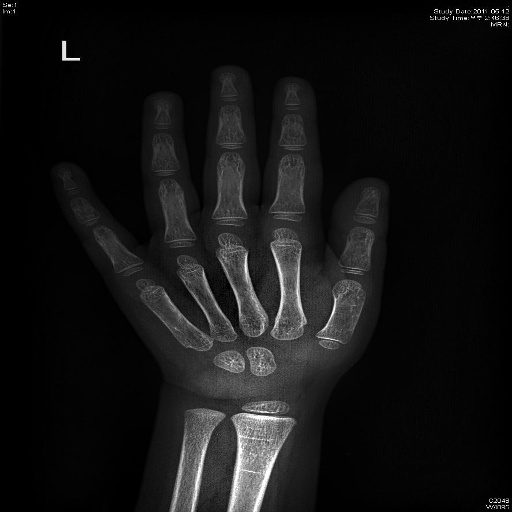

In [80]:
Image.open('/content/drive/MyDrive/bone/grey_res/grey_res2.jpg')

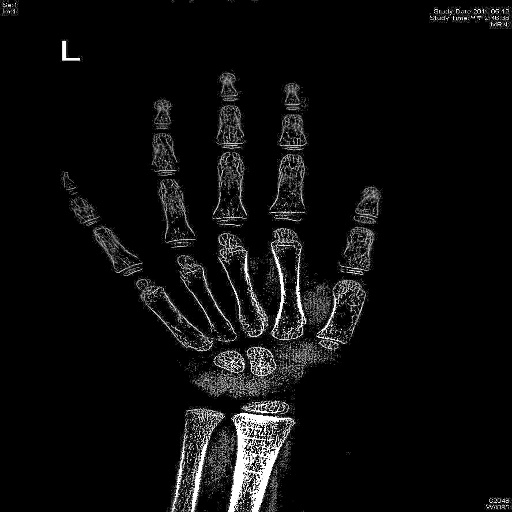

In [83]:
Image.open('/content/drive/MyDrive/bone/grey_res/grey_res5.jpg')

### 여기서부터가 UNet 사용...

훈련 데이터는 membrane 사용

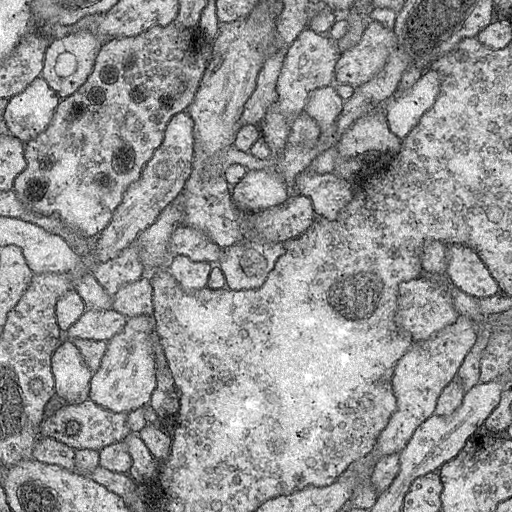

In [84]:
Image.open('/content/drive/MyDrive/data/membrane/test/0.png')

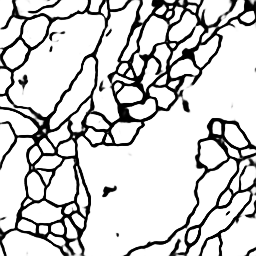

In [85]:
Image.open('/content/drive/MyDrive/data/membrane/test/0_predict.png')

In [1]:
!git clone https://github.com/hanyoseob/youtube-cnn-002-pytorch-unet.git

Cloning into 'youtube-cnn-002-pytorch-unet'...
remote: Enumerating objects: 65, done.
remote: Counting objects: 100% (65/65), done.
remote: Compressing objects: 100% (48/48), done.
remote: Total 65 (delta 29), reused 52 (delta 16), pack-reused 0
Unpacking objects: 100% (65/65), done.


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd /content/youtube-cnn-002-pytorch-unet

/content/youtube-cnn-002-pytorch-unet


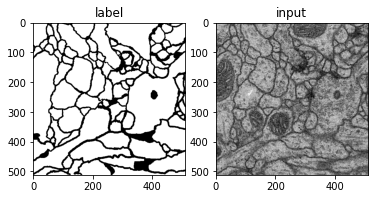

In [4]:
## 필요한 패키지 등록
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

## 데이터 불러오기
dir_data = './datasets'

name_label = 'train-labels.tif'
name_input = 'train-volume.tif'

img_label = Image.open(os.path.join(dir_data, name_label))
img_input = Image.open(os.path.join(dir_data, name_input))

ny, nx = img_label.size
nframe = img_label.n_frames

##
nframe_train = 24
nframe_val = 3
nframe_test = 3

dir_save_train = os.path.join(dir_data, 'train')
dir_save_val = os.path.join(dir_data, 'val')
dir_save_test = os.path.join(dir_data, 'test')

if not os.path.exists(dir_save_train):
    os.makedirs(dir_save_train)

if not os.path.exists(dir_save_val):
    os.makedirs(dir_save_val)

if not os.path.exists(dir_save_test):
    os.makedirs(dir_save_test)

##
id_frame = np.arange(nframe)
np.random.shuffle(id_frame)

##
offset_nframe = 0

for i in range(nframe_train):
    img_label.seek(id_frame[i + offset_nframe])
    img_input.seek(id_frame[i + offset_nframe])

    label_ = np.asarray(img_label)
    input_ = np.asarray(img_input)

    np.save(os.path.join(dir_save_train, 'label_%03d.npy' % i), label_)
    np.save(os.path.join(dir_save_train, 'input_%03d.npy' % i), input_)

##
offset_nframe = nframe_train

for i in range(nframe_val):
    img_label.seek(id_frame[i + offset_nframe])
    img_input.seek(id_frame[i + offset_nframe])

    label_ = np.asarray(img_label)
    input_ = np.asarray(img_input)

    np.save(os.path.join(dir_save_val, 'label_%03d.npy' % i), label_)
    np.save(os.path.join(dir_save_val, 'input_%03d.npy' % i), input_)

##
offset_nframe = nframe_train + nframe_val

for i in range(nframe_test):
    img_label.seek(id_frame[i + offset_nframe])
    img_input.seek(id_frame[i + offset_nframe])

    label_ = np.asarray(img_label)
    input_ = np.asarray(img_input)

    np.save(os.path.join(dir_save_test, 'label_%03d.npy' % i), label_)
    np.save(os.path.join(dir_save_test, 'input_%03d.npy' % i), input_)

##
plt.subplot(121)
plt.imshow(label_, cmap='gray')
plt.title('label')

plt.subplot(122)
plt.imshow(input_, cmap='gray')
plt.title('input')

plt.show()


In [7]:
!python train.py

learning rate: 1.0000e-03
batch size: 4
number of epoch: 100
data dir: ./datasets
ckpt dir: ./checkpoint
log dir: ./log
result dir: ./result
mode: train
/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to 

In [ ]:
##

img = Image.open('/content/drive/MyDrive/bone/grey/3.jpg')
img_numpy = np.array(img, 'uint8')
gray = cv2.cvtColor(img_numpy, cv2.COLOR_BGR2GRAY)
cv2.imwrite("/content/drive/MyDrive/bone/grey/2.jpg" , gray)

In [ ]:
cv2.imwrite('저장할이미지이름.jpg', 이미지 파일)

In [20]:
gray.shape

(1260, 888)

In [12]:
import cv2
import numpy as np

path = '/content/drive/MyDrive/bone/grey'
for file_name in os.listdir(path):
  image = cv2.imread(os.path.join(path, file_name))
  res = cv2.resize(image, dsize=(512, 512), interpolation=cv2.INTER_CUBIC)
  print(res.shape)
  # cv2.imwrite("/content/drive/MyDrive/bone/grey_res" + file_name[:-4] + ".jpg" , res)

(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)


In [ ]:
img = Image.open('/content/drive/MyDrive/bone/9.jpg')
img_numpy = np.array(img, 'uint8')
gray = cv2.cvtColor(img_numpy, cv2.COLOR_BGR2GRAY)
cv2.imwrite("/content/drive/MyDrive/bone/grey/" + '13' + ".jpg" , gray)

In [68]:
import cv2
import os
import numpy as np
from PIL import Image
 
path = "/content/drive/MyDrive/bone/grey_res"
imagePaths = [os.path.join(path,file_name) for file_name in os.listdir(path)]
count = 0
for i, imagePath in enumerate(imagePaths):
    count += 1
    img = Image.open(imagePath)
    img_numpy = np.array(img, 'uint8')
    # print(img_numpy)
    gray = cv2.cvtColor(img_numpy, cv2.COLOR_BGR2GRAY)
    print(gray.shape)
#     print(imagePath)
    cv2.imwrite(f"/content/drive/MyDrive/bone/grey/{i}.jpg" , gray)
print("All Done")

(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
All Done


In [70]:
data = Image.open('/content/drive/MyDrive/bone/grey_res/grey_res1.jpg')
data = np.array(data, 'uint8')
data.shape

(512, 512, 3)

In [23]:
!pwd

/content/youtube-cnn-002-pytorch-unet


In [73]:
## 필요한 패키지 등록
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

## 데이터 불러오기
dir_data = './datasets'
dir_data_test = './datasets/test'

path = '/content/drive/MyDrive/bone/grey'
for file_name in os.listdir(path):
  # print(file_name)
  image = Image.open(os.path.join(path, file_name))
  # print(image.shape)
  input_ = np.asarray(image)
  print(input_.shape)
  dir_save_test = os.path.join(dir_data_test, file_name)
  # print(dir_save_test)
  np.save(dir_save_test[:-4], input_)

# plt.subplot(111)
# plt.imshow(input_, cmap='gray')
# plt.title('input')

# plt.show()

(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)


IsADirectoryError: ignored

In [82]:
!python3 train.py \
--lr 1e-2 --batch_size 3 --num_epoch 300 \
--data_dir "./datasets" \
--ckpt_dir "./checkpoint_v2" \
--log_dir "./log_v2" \
--result_dir "./result_v2" \
--mode "test" \
--train_continue "off"

learning rate: 1.0000e-02
batch size: 3
number of epoch: 300
data dir: ./datasets
ckpt dir: ./checkpoint_v2
log dir: ./log_v2
result dir: ./result_v2
mode: test
/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker nu

In [77]:
!pwd

/content/youtube-cnn-002-pytorch-unet


In [75]:
!python3 eval.py

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
TEST: BATCH 0001 / 0003 | LOSS 0.9447
Traceback (most recent call last):
  File "eval.py", line 290, in <module>
    for batch, data in enum

In [74]:
data2 = np.load('/content/youtube-cnn-002-pytorch-unet/datasets/test/1.npy')
data2.shape

(512, 512)

### 결과....

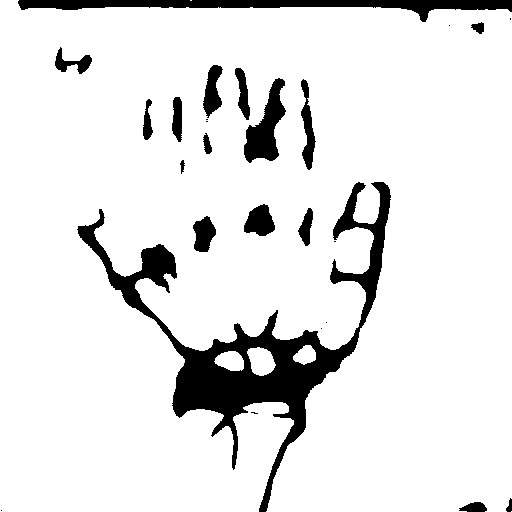

In [86]:
Image.open('/content/youtube-cnn-002-pytorch-unet/results/png/output_0003.png')

# 내가 반드시 발전해서 다 부셔주겠다!!!